<a href="https://colab.research.google.com/github/MmoniqueL/ML_Heart-Disease/blob/main/Notebooks/Slt_6_Assgnment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introdução**

Com o objetivo de avaliar a saúde cardiáca dos pacientes com maior rapidez e eficiência, foi disponibilizado um conjunto de dados que contém informações do estado geral de saúde de pacientes com o intuito de avaliaar a influência desses fatores na condição cardíaca dos pacientes.

Neste trabalho busca-se construir um modelo de Machine Learning com hiperparâmetros optimizados, que possa prever se o paciente tem ou não problemas no coração. 

Ao todo, existem 14 variáveis no conjunto de dados:

**age**: Idade da pessoa em anos

**sex**: Sexo da pessoa (1 = mascculino, 0 = feminino)

**cp**: Nível de dor (1:angina típico,2: angina atípico,3: dor não-anginal,4: assintomático)

**trestbps**: Pressão sanguínea em repouso

**chol**: Colesterol em mg/dl

**fbs**: Teste de diabetes (> 120 mg/dl, 1 = verdadeiro; 0 = falso)

**restecg**: Eletrocardiograma em repouso (0 = normal, 1 = anormalidade ST-T , 2 = provável hipertrofia ventricular, segundo critério de Estes)

**thalach**: Rítmo cardíaco máximo

**exang**: Angina induzida por exercício (1 = sim; 0 = não)

**oldpeak**: Depressão de ST induzida por exercício em relação ao
repouso

**slope**:  Tipo de inclinação do segmento ST de pico do exercício (1: ascendente, Value 2: horizontal, Value 3: descendente)

**ca**: número de vasos sanguínios ressaltados (0-3)

**thal**: Thalassemia (3 = normal; 6 = defeito consertado; 7 = defeito reversível)

**target**: Doença no coração (0 = não, 1 = sim)

#1. Importando os Dados

##a) Importando bibliotecas utilizadas




In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn.metrics import f1_score

##b) Importando Dados

In [2]:
# Carregando base de dados

df = pd.read_csv("/content/heart.csv")

In [3]:
#Visualizar dados importados
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#2. Análise D;escritiva

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
 #Limiting floats output to 3 decimal points
pd.set_option("display.float_format", lambda x: "{:.3f}".format(x))


#EDA do conjunto de dados
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [7]:
#Quantidade de nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

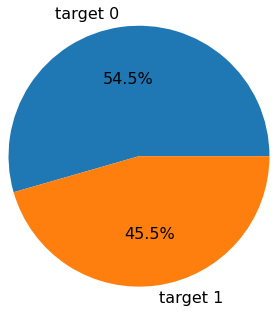

In [8]:
# Distruibuição da variáveis target
plt.pie(df.target.value_counts(), labels = ["target 0", "target 1"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

**Análise de Correlação**

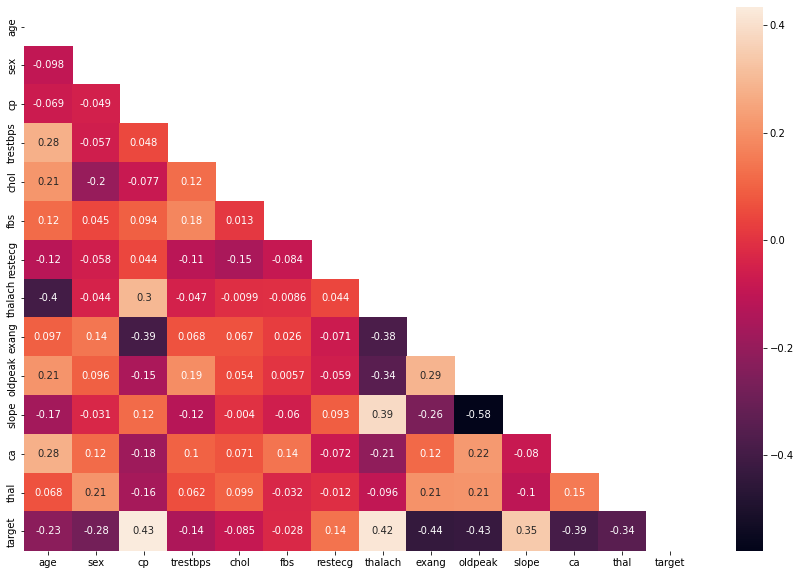

In [17]:
#Correlação
plt.figure(figsize=(15,10))
matrix = df.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, mask=mask, annot=True)

In [18]:
matrix['target'].abs().sort_values(ascending=False)[:-1]

target     1.000
exang      0.437
cp         0.434
oldpeak    0.431
thalach    0.422
ca         0.392
slope      0.346
thal       0.344
sex        0.281
age        0.225
trestbps   0.145
restecg    0.137
chol       0.085
Name: target, dtype: float64

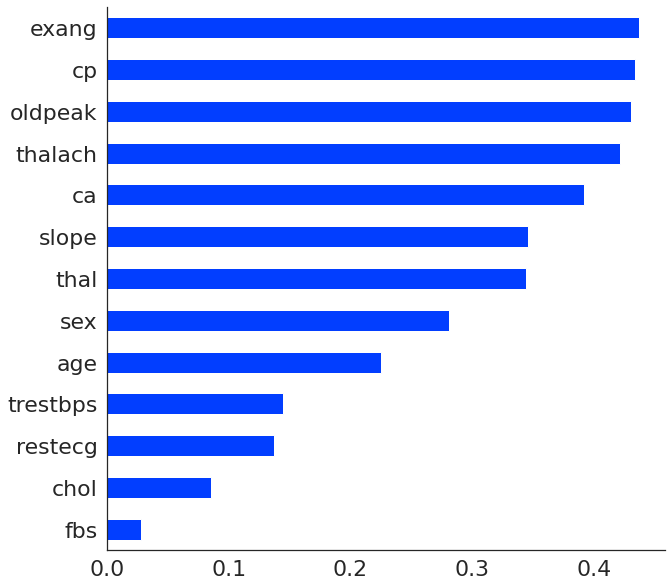

In [19]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 10))
sns.set_style("white")
sns.set_palette("bright")
matrix['target'].abs().sort_values(ascending=True)[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')
sns.despine()

###Análise de Outliers


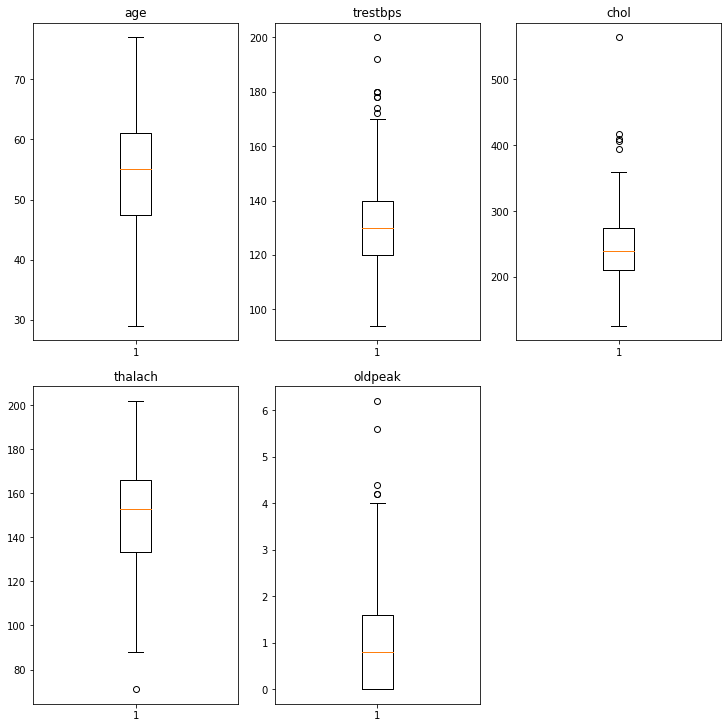

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

df_continuous = df[['age','trestbps','chol','thalach','oldpeak']]

def draw_boxplots(df, selected_features):
  n = len(selected_features)
  fig = plt.figure(constrained_layout=True, figsize=(10, 10))
  gs = gridspec.GridSpec(int(n/3) + 1, 3, figure=fig)
  for i in range(n):
    k = int(i / 3)
    j = i % 3
    col = selected_features[i]
    ax = fig.add_subplot(gs[k, j])
    ax.set_title(col)
    ax.boxplot(df[col])

draw_boxplots(df_continuous, df_continuous.columns)

**Eliminar outliers**

In [14]:
df_without_outlier = df.copy()

In [12]:
def replace_outliers(df, var_names):
  for var_name in var_names:
    # calculating Q1 and Q3
    Q1 = df.loc[:,var_name].quantile(0.25)
    Q3 = df.loc[:,var_name].quantile(0.75)
    # calculating Interquartile IQR
    IQR = Q3 - Q1
    # build up filter
    filter_up = (df.loc[:,var_name] > Q3 + 1.5 *IQR)
    # apply up filter on df
    df.loc[filter_up, var_name] = Q3 + 1.5 *IQR
    # build down filter
    filter_down = (df.loc[:,var_name] < Q1 - 1.5 * IQR)
    # apply down filter on df
    df.loc[filter_down, var_name] = Q1 - 1.5 * IQR

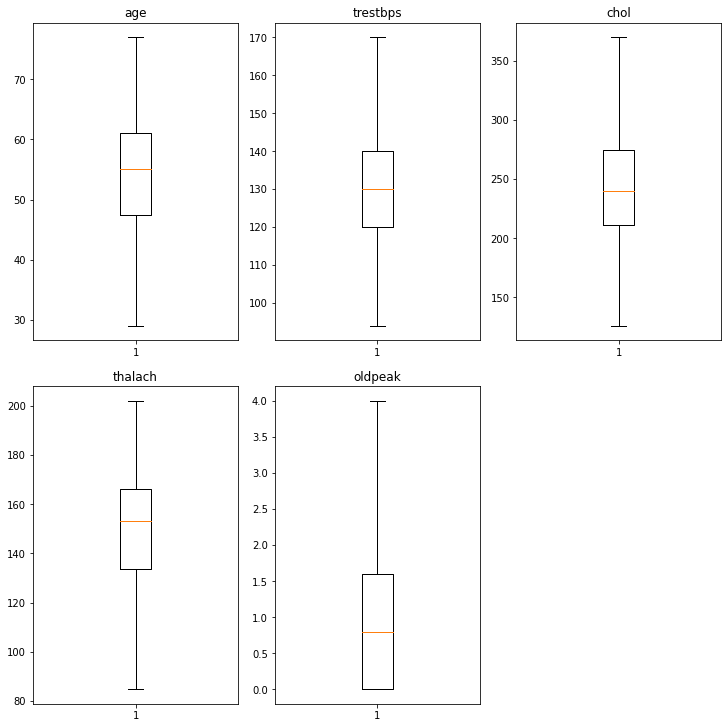

In [15]:
replace_outliers(df_without_outlier, df_without_outlier.columns)
draw_boxplots(df_without_outlier[['age','trestbps','chol','thalach','oldpeak']], df_without_outlier[['age','trestbps','chol','thalach','oldpeak']].columns)

**Histogramas**

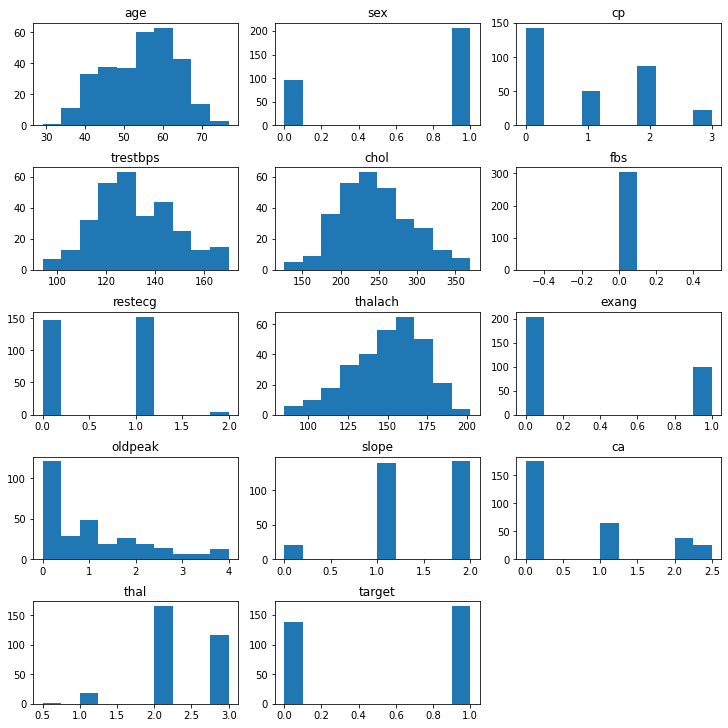

In [16]:
def draw_histplots(df, selected_features):
  n = len(selected_features)
  fig = plt.figure(constrained_layout=True, figsize=(10, 10))
  gs = gridspec.GridSpec(int(n/3) + 1, 3, figure=fig)
  for i in range(n):
    k = int(i / 3)
    j = i % 3
    col = selected_features[i]
    ax = fig.add_subplot(gs[k, j])
    ax.set_title(col)
    ax.hist(df[col])

draw_histplots(df_without_outlier, df_without_outlier.columns) 

**Normalização do Dados**

In [38]:
# Separar os valores de atributo e alvo

X = df_without_outlier.drop('target',axis=1)
y = df_without_outlier['target']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
from sklearn.preprocessing import MaxAbsScaler

In [24]:
max_scaler = MaxAbsScaler()

In [39]:
X_train_max = max_scaler.fit_transform(X_train)

**Padronização dos Dados**

In [29]:
from sklearn import preprocessing

In [30]:
std_scaler = preprocessing.StandardScaler(with_mean = False)

In [40]:
std_scaler.fit(X_train_max)
X_train_stand = std_scaler.transform(X_train_max)

In [41]:
X_train_stand.shape

(242, 13)

##3.Modelo de ML

###a) Modelo de Decisio Tree


In [45]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train_stand,y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
y_pred = clf.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred)*100}%")

Acurácia: 72.1311475409836%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


###b) Modelo Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', n_estimators=150) 
clf.fit(X_train_stand,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [48]:
y_pred = clf.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred)*100}%")

Acurácia: 68.85245901639344%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [58]:
print(f'F1 score: {f1_score(y_test, y_pred, average=None)}')


F1 score: [0.77777778 0.82352941]


#4. Otimização de hiperparêmetros

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None, 80, 110],
    'max_features': [None, 2, 3, 4],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [50,100, 200],
    'criterion':['gini', 'entropy']
}

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                          cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X,y)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 80, 110],
                         'max_features': [None, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [53]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [65]:
# Classificador Random Forest
# Configurando com os melhores parametros encontrados pelo grid search

clf_2 = RandomForestClassifier( bootstrap=True,
                              criterion='gini',
                              max_depth=110,
                              max_features=2,
                              min_samples_leaf=3,
                              min_samples_split=4,
                              n_estimators=100) 
clf_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=110, max_features=2, min_samples_leaf=3,
                       min_samples_split=4)

In [66]:
 from sklearn.metrics import accuracy_score

y_pred_2 = clf_2.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred_2)*100}%")

Acurácia: 78.68852459016394%


In [67]:
print(f'F1 score: {f1_score(y_test, y_pred_2, average=None)}')

F1 score: [0.75471698 0.8115942 ]
